In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading dataset
df = pd.read_csv('Housing.csv')

# Displaying basic information about the dataset
print(df.head())
print("\nDataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset shape: (545, 13)

Data types:
 price                int64
area                 int64
bedro

In [2]:
# List of categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']

# Converting yes/no to 1/0
for col in categorical_cols[:-1]:  # All except furnishingstatus
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Converting furnishingstatus to dummy variables
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Displaying the transformed data
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       


Simple Linear Regression Results (Area vs Price):
MAE: 1474748.13
MSE: 3675286604768.19
RMSE: 1917103.70
R²: 0.2729


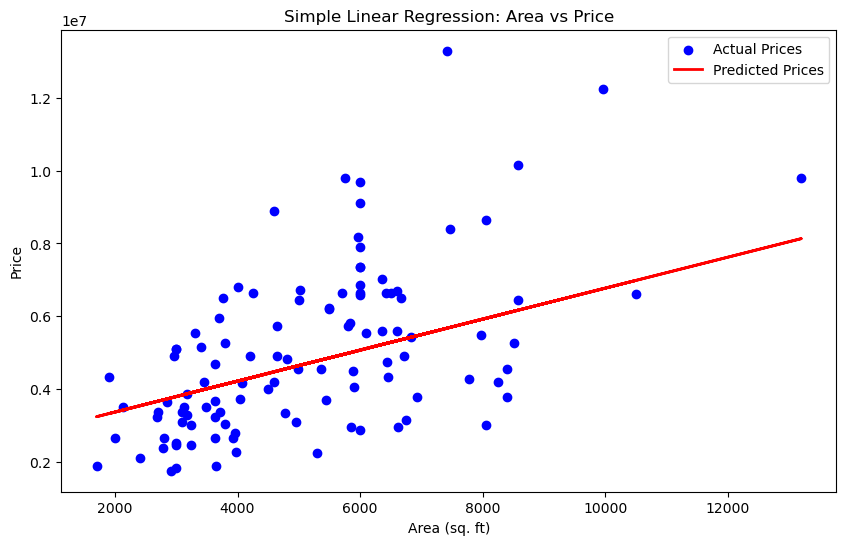


Model Coefficients:
Slope (Area): 425.73
Intercept: 2512254.26
Interpretation: For each additional square foot of area, the price increases by 425.72984193878284


In [3]:
# Simple Linear Regression - Using 'area' as predictor
X = df[['area']]  # Predictor (must be 2D array)
y = df['price']    # Target

# Spliting data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model
print("\nSimple Linear Regression Results (Area vs Price):")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

# Plotting regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area (sq. ft)')
plt.ylabel('Price')
plt.legend()
plt.show()

# Interpreting coefficients
print("\nModel Coefficients:")
print(f"Slope (Area): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print("Interpretation: For each additional square foot of area, the price increases by", model.coef_[0])

In [4]:
# Preparing data for multiple regression
X = df.drop('price', axis=1)
y = df['price']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Make predictions
y_multi_pred = multi_model.predict(X_test)

# Evaluate model
print("\nMultiple Linear Regression Results:")
print(f"MAE: {mean_absolute_error(y_test, y_multi_pred):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_multi_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_multi_pred)):.2f}")
print(f"R²: {r2_score(y_test, y_multi_pred):.4f}")

# Display coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(X.columns, multi_model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {multi_model.intercept_:.2f}")


Multiple Linear Regression Results:
MAE: 970043.40
MSE: 1754318687330.66
RMSE: 1324506.96
R²: 0.6529

Feature Coefficients:
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
mainroad: 367919.95
guestroom: 231610.04
basement: 390251.18
hotwaterheating: 684649.89
airconditioning: 791426.74
parking: 224841.91
prefarea: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
Intercept: 260032.36


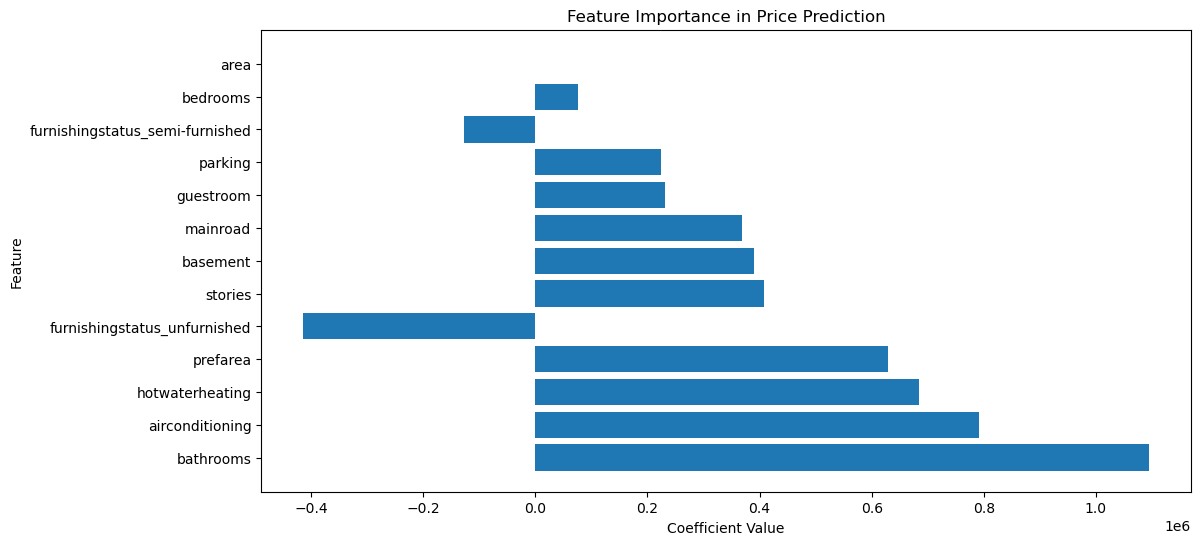

In [5]:
# Creating a DataFrame with feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': multi_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.title('Feature Importance in Price Prediction')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

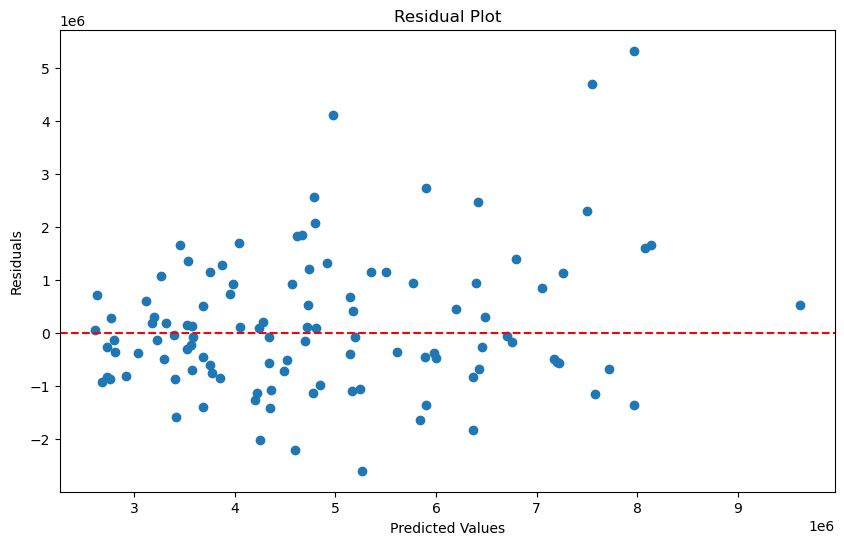

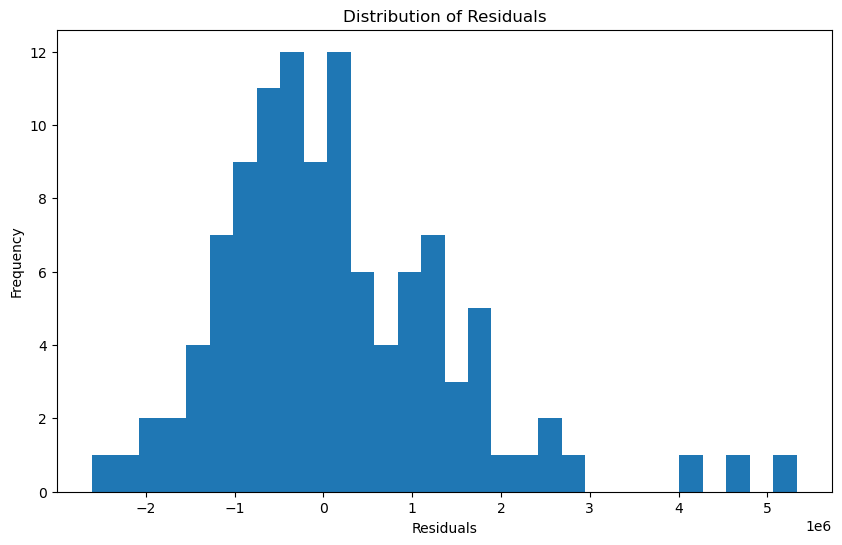

In [6]:
# Calculating residuals
residuals = y_test - y_multi_pred

# Ploting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_multi_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()